In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.initializers import RandomNormal, Ones
pd.set_option('display.max_columns', None)

In [2]:
dfX = pd.read_csv("summary/data_sd.csv", index_col=0)
dfX = dfX.drop(columns=["sd_exposure", "sdStandard", "multiEye", "id", "sdid", "gpstime", "sd_gpsnanotime"])
dfE = pd.DataFrame(dfX.pop("sd_energy"))
dfdE = pd.DataFrame(dfX.pop("sd_denergy"))

In [3]:
dfX = (dfX - dfX.mean())/dfX.std()
dfE = (dfE - dfE.mean())/dfE.std()
dfdE = (dfdE - dfdE.mean())/dfdE.std()

In [4]:
X_train_full, X_test, e_train_full, e_test = train_test_split(dfX, dfE, test_size=0.2, random_state=42)
X_train, X_valid, e_train, e_valid = train_test_split(X_train_full, e_train_full, random_state=42)

In [11]:
dfX

,sd_theta,sd_dtheta,sd_phi,sd_dphi,sd_l,sd_b,sd_ra,sd_dec,sd_x,sd_dx,sd_y,sd_dy,sd_z,sd_easting,sd_northing,sd_altitude,sd_R,sd_dR,sd_s1000,sd_ds1000,sd_s38,sd_gcorr,sd_wcorr,sd_beta,sd_gamma,sd_chi2,sd_ndf,sd_geochi2,sd_geondf,sd_nbstat
0,-1.251941,1.782145,-1.417997,-0.111880,-0.128675,-1.402350,-1.343263,0.240807,-0.189018,-0.076273,-1.279622,-0.706126,-0.090253,-0.185757,-1.279581,-0.433949,-0.660473,-0.500098,0.103684,-0.343956,-0.128789,0.857225,-1.912191,-1.092043,-0.338155,-0.475050,-0.791381,-0.204631,-0.533606,-0.791381
1,0.877907,-1.135016,-0.910670,-0.376658,-0.458354,-0.453586,-1.179284,1.689628,-0.198504,-1.268380,-0.506587,-0.475295,0.527721,-0.197269,-0.506868,-0.208018,0.454603,-0.073852,1.201261,0.866614,1.740846,1.211221,-0.895459,0.365737,1.417518,0.021104,1.089940,-0.053498,1.069962,1.089940
2,-1.704429,1.821040,-0.710297,0.848887,-1.810980,-0.819042,1.364402,0.254686,-0.040522,-0.852644,-0.901990,-0.129424,0.245824,-0.038188,-0.901734,-0.376945,-1.006521,0.090588,0.188219,0.760836,-0.057157,0.857225,-2.342346,-1.268744,-0.338155,-0.476326,-0.321051,-0.253356,-0.533606,-0.321051
3,1.269362,-0.901643,1.505334,-0.376658,0.234189,0.139015,-0.643620,-0.300477,-0.347923,1.254541,-0.648056,-0.230600,0.493909,-0.346382,-0.648645,-0.164082,1.533968,0.157188,-0.337369,-0.461487,-0.040939,-2.151744,-0.269779,1.425940,0.665087,0.626947,1.560271,0.610496,1.604484,1.560271
4,0.092192,-0.473793,1.359512,-0.202661,1.100572,-0.876990,1.383677,-0.814389,0.095449,-0.212318,-1.583094,-0.243340,-0.495786,0.099625,-1.582243,-0.591513,0.372325,0.081437,-0.122356,0.525774,-0.217991,-0.204764,-1.130090,-0.208540,-0.839775,-0.435511,-0.321051,-0.222387,-0.533606,-0.321051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22746,1.326887,-0.279315,0.120940,-0.357746,0.825628,1.308637,0.242154,0.075029,-0.006637,4.016871,0.261618,-0.396978,0.488817,-0.007328,0.261501,-0.184156,1.436243,1.017448,-0.614864,-0.872845,-0.448204,-2.328743,0.551427,1.779341,0.414276,0.065745,-0.321051,-0.095617,-0.533606,-0.321051
22747,1.001377,-0.396002,-1.663328,-0.323703,-0.200502,-1.050561,-1.233273,0.551929,-0.137812,0.577354,1.574535,-0.450938,0.681501,-0.141970,1.573571,1.201347,-0.003969,0.435812,-0.335531,-0.496746,-0.142755,-0.912757,0.981583,0.984189,1.919138,-0.276078,0.149279,-0.215367,0.000916,0.149279
22748,1.577334,-0.473793,0.509962,-0.388006,1.022108,-0.229721,0.984182,-1.098139,1.256168,1.015891,-0.209836,1.613799,-0.497008,1.257231,-0.206702,-0.802861,0.642115,-0.155402,-0.616242,-1.002129,-0.353145,-3.213733,0.473217,2.265268,-1.843016,1.911336,1.089940,0.136864,1.069962,1.089940
22749,-0.060040,-0.357106,-0.352959,-0.176183,-0.086761,-0.124485,-0.889109,0.743923,-0.120482,-0.046631,-1.368210,-1.172285,-0.213685,-0.116960,-1.367968,-0.494929,-0.236197,-0.500098,0.004906,-0.120647,-0.054454,0.680227,1.646369,-0.385241,-1.090585,-0.448265,-0.791381,-0.233123,-0.533606,-0.791381


In [5]:
modelE = Sequential([
    Dense(128, activation="relu", input_shape=X_train.shape[1:], activity_regularizer="l1_l2"),
    Dense(128, activation="relu", activity_regularizer="l1_l2"),
    Dense(1)
])

modelE.compile(loss="mean_squared_error", optimizer=Adam(learning_rate=0.001))
history = modelE.fit(X_train, e_train, epochs=10, validation_data=(X_valid, e_valid))
modelE.save("modelo_E.h5")

Epoch 1/10
427/427 [==============================] - 2s 2ms/step - loss: 0.3046 - val_loss: 0.0917
Epoch 2/10
427/427 [==============================] - 1s 1ms/step - loss: 0.0758 - val_loss: 0.0467
Epoch 3/10
427/427 [==============================] - 1s 1ms/step - loss: 0.0460 - val_loss: 0.0370
Epoch 4/10
427/427 [==============================] - 1s 1ms/step - loss: 0.0328 - val_loss: 0.0342
Epoch 5/10
427/427 [==============================] - 1s 1ms/step - loss: 0.0375 - val_loss: 0.0232
Epoch 6/10
427/427 [==============================] - 1s 1ms/step - loss: 0.0248 - val_loss: 0.0254
Epoch 7/10
427/427 [==============================] - 1s 1ms/step - loss: 0.0206 - val_loss: 0.0174
Epoch 8/10
427/427 [==============================] - 1s 1ms/step - loss: 0.0180 - val_loss: 0.0155
Epoch 9/10
427/427 [==============================] - 1s 1ms/step - loss: 0.0166 - val_loss: 0.0176
Epoch 10/10
427/427 [==============================] - 1s 1ms/step - loss: 0.0192 - val_loss: 0.0138

In [6]:
predictE = modelE.predict(dfX)

711/711 [==============================] - 1s 733us/step


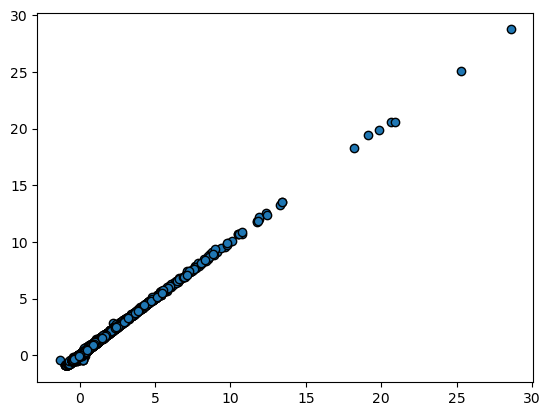

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(predictE, dfE, edgecolors=(0, 0, 0))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig, axes = plt.subplots()
axes.set_title('Correlacion Xmax DNN contra Xmax true: QGSJETII04 Hierro')
axes.scatter(Ydnn, Ytrue, edgecolors=(0, 0, 0))
axes.set_xlabel(r'$X_{max,\;DNN}$  $[g/cm^{2}]$')
axes.set_ylabel(r'$X_{max,\;true}$  $[g/cm^{2}]$')
left, bottom, width, height = [0.23, 0.1, 0.3, 0.4]
axes.text(0.98,0.25, \
          r"$\mu = $ %.3f " % np.mean(reco) + r"$[g/cm^{2}]$" + \
          "\n" + "$\sigma = $ %.2f " % np.std(reco) + r"$[g/cm^{2}]$" +\
          "\n" + "corr =  %.3f " % np.corrcoef(Ydnn.T,Ytrue.T)[0,1] \
          + r"       ",
          verticalalignment = 'top', horizontalalignment = \
          'right', transform=axes.transAxes, backgroundcolor='w')
axes.plot([Ytrue.min(), Ytrue.max()], [Ytrue.min(), Ytrue.max()], "r--", lw=4)

<function matplotlib.pyplot.show(close=None, block=None)>

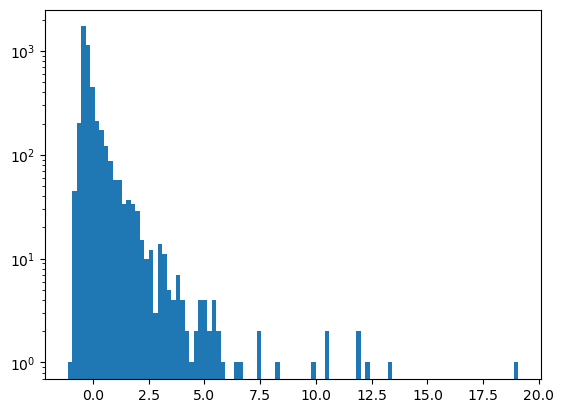

In [267]:
import matplotlib.pyplot as plt

plt.hist(predictE, bins=100)
plt.yscale("log")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

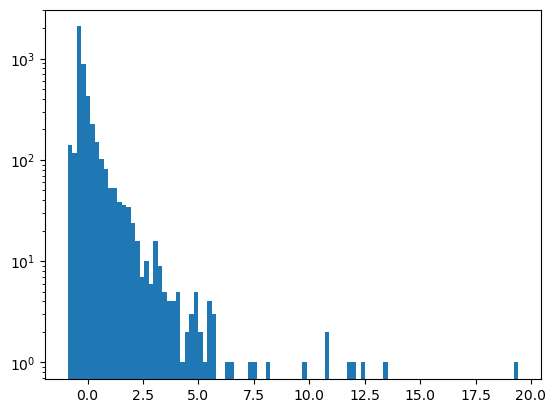

In [268]:
plt.hist(e_valid, bins=100)
plt.yscale('log')
plt.show

In [25]:
modelE.save("modelo_E.h5")